In [1]:
from qiskit import QuantumCircuit, assemble, Aer
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_vector, array_to_latex, plot_bloch_multivector
from math import sqrt, pi
from IPython.display import display, Math
from qiskit.quantum_info import random_statevector
svsim = Aer.get_backend('aer_simulator') 

# Q1
We need to implement the CSWAP gate. <br>
To do this we can use the 3-CX gate implementation of the SWAP gate, and add a control qubit.<br>
Thus, we end up using 3 Toffoli gates.

# Q2
Initial states of the system is : $|0\psi\phi\rangle$, then it becomes $|+\psi\phi\rangle$<br>
After the CSWAP operation, the state of the 3-qubit system is: $\frac{|0\psi\phi\rangle + |1\phi\psi\rangle }{\sqrt 2}$<br>
and after the final Hadamard gate it is: $\Phi = \frac{|0\psi\phi\rangle + |0\phi\psi\rangle }{2} + \frac{|1\psi\phi\rangle - |1\phi\psi\rangle }{2}$, $\rho = |\Phi\rangle\langle\Phi|$<br>
$\rho = \frac{|0\rangle\langle 0|}{4}\otimes(|\psi\phi\rangle+|\phi\psi\rangle)(\langle \psi\phi| + \langle \phi\psi|) + \frac{|1\rangle\langle 1|}{4}\otimes(|\psi\phi\rangle-|\phi\psi\rangle)(\langle \psi\phi|- \langle \phi\psi|)$<br>
If we consider the sub-system of only the first qubit by tracing out the other 2 qubits' state:<br>
Using, $\langle\psi\phi|\psi\phi\rangle = 1, \langle\psi\phi|\phi\psi\rangle = \langle\psi|\phi\rangle\cdot\langle\phi|\psi\rangle = |\langle\psi|\phi\rangle|^2$<br>
$\rho^{q_1} = |0\rangle\langle 0|\cdot\frac{1 + |\langle\psi|\phi\rangle|^2}{2} + |1\rangle\langle 1|\cdot\frac{1 - |\langle\psi|\phi\rangle|^2}{2} $<br>

Thus, measuring the first qubit in the standard basis will return 0 with $P(0) = \frac{1 + |\langle\psi|\phi\rangle|^2}{2}\implies
|\langle\psi|\phi\rangle| = \sqrt{2P(0)-1}$


In [2]:
a = (1+0.5j)/(2*sqrt(2))
b = sqrt(6.75)/(2*sqrt(2))
c = 1.j*sqrt(2)/np.sqrt(3)
d = 1/np.sqrt(3)
state_1 = [a, b]
state_2 = [c, d]
inner_prod = np.absolute(np.conjugate(a) * c + np.conjugate(b) * d)
print("Magnitude of the inner product of the 2 states = ", inner_prod)

Magnitude of the inner product of the 2 states =  0.7338322530324048


# Q3

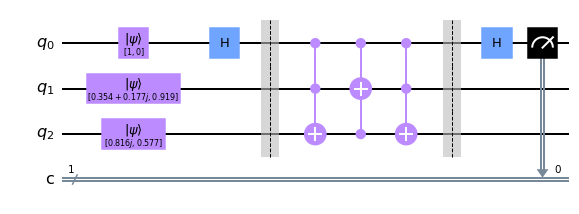

In [3]:
qc = QuantumCircuit(3, 1)
qc.initialize([1, 0], 0)
qc.initialize(state_1, 1)
qc.initialize(state_2, 2)
qc.h(0)
qc.barrier()
qc.ccx(0, 1, 2)
qc.ccx(0, 2, 1)
qc.ccx(0, 1, 2)
qc.barrier()
qc.h(0)
qc.measure(0, 0)
qc.draw('mpl')

Calculated inner product =  0.7395944834840238


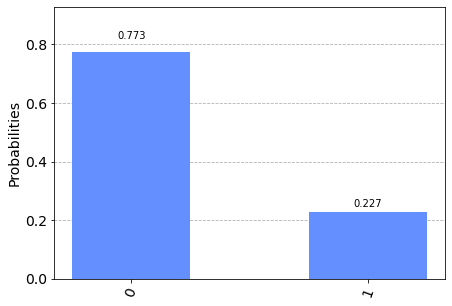

In [4]:
counts = svsim.run(assemble(qc, shots=10000)).result().get_counts()
x = counts['0']/10000
print("Calculated inner product = ", np.sqrt(2*x - 1))
plot_histogram(counts)